# meshgrid
2차원 그리드 포인트 생성

변수가 2개인 2차원 함수의 그래프를 그리거나 표를 작성하려면 2차원 영역에 대한 (x,y) 좌표값 쌍 즉, 그리드 포인트(grid point)를 생성하여 각 좌표에 대한 함수 값을 계산해야 한다. 
<br>meshgrid 명령은 사각형 영역을 구성하는 "가로축의 점들과 세로축의 점을 나타내는 두 벡터"를 인수로 받아서 이 사각형 영역을 이루는 조합을 출력한다. 결과는 그리드 포인트의 x 값만을 표시하는 행렬과 y 값만을 표시하는 행렬 "두 개로 분리하여 출력"한다.

In [1]:
import numpy as np
x = np.arange(0,4,1)
y = np.arange(0,6,1)

In [3]:
x

array([0, 1, 2, 3])

In [4]:
y

array([0, 1, 2, 3, 4, 5])

In [5]:
X,Y = np.meshgrid(x,y)

In [6]:
X

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

In [7]:
Y

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3],
       [4, 4, 4, 4],
       [5, 5, 5, 5]])

In [8]:
[(x,y) for x,y in zip(X,Y)]

[(array([0, 1, 2, 3]), array([0, 0, 0, 0])),
 (array([0, 1, 2, 3]), array([1, 1, 1, 1])),
 (array([0, 1, 2, 3]), array([2, 2, 2, 2])),
 (array([0, 1, 2, 3]), array([3, 3, 3, 3])),
 (array([0, 1, 2, 3]), array([4, 4, 4, 4])),
 (array([0, 1, 2, 3]), array([5, 5, 5, 5]))]

In [9]:
[list(zip(x,y)) for x,y in zip(X,Y)]

[[(0, 0), (1, 0), (2, 0), (3, 0)],
 [(0, 1), (1, 1), (2, 1), (3, 1)],
 [(0, 2), (1, 2), (2, 2), (3, 2)],
 [(0, 3), (1, 3), (2, 3), (3, 3)],
 [(0, 4), (1, 4), (2, 4), (3, 4)],
 [(0, 5), (1, 5), (2, 5), (3, 5)]]

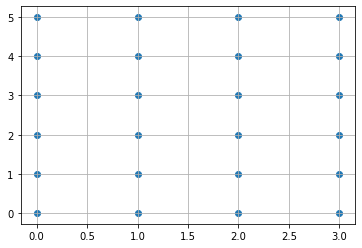

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X, Y)
plt.grid()
plt.show()

# 배열 붙이기
- 두 배열을 왼쪽에서 오른쪽으로 붙이기 <br>np.r_\[a, b\] , np.hstack(\[a, b\]) , np.concatenate((a, b), axis = 0)

- 두 배열을 위에서 아래로 붙이기 <br>np.r_\[\[a\], \[b\]\] , np.vstack(\[a, b\]) , np.concatenate((c, d), axis = 1)

- 두 개의 1차원 배열을 칼럼으로 세로로 붙여서 2차원 배열 만들기<br>np.c_\[a, b\] , np.column_stack(\[a, b\]) , np.concatenate((c.T, d.T), axis = 1)

# meshgrid를 이용해 그림 그리기
## iris 데이터셋을 이용

In [17]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:,:2]
y = iris.target

In [18]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=1000)
clf.fit(X,y)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

Text(0.5, 1.0, '3-Class classification with Softmax Regressions')

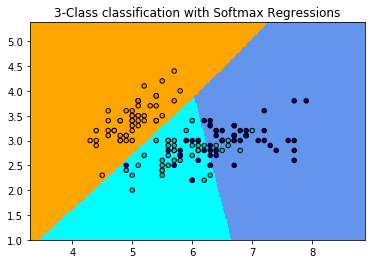

In [27]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# np.c_[xx.ravel(), yy.ravel()]는 모든 가능한 쌍(0.02 간격) 
# shape : (None,2) -> 분류기로 예측 후 2차원 평면의 모양으로 reshape
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()

# 구간을 색으로 나눠놓는 명령어
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f'3-Class classification with Softmax Regressions')

그림 코드에 대해 개개의 자세한 모양은 아래를 참고

In [37]:
xx.shape

(220, 280)

In [38]:
yy.shape

(220, 280)

In [39]:
xx

array([[3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       ...,
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88]])

In [40]:
yy

array([[1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.02, 1.02, 1.02, ..., 1.02, 1.02, 1.02],
       [1.04, 1.04, 1.04, ..., 1.04, 1.04, 1.04],
       ...,
       [5.34, 5.34, 5.34, ..., 5.34, 5.34, 5.34],
       [5.36, 5.36, 5.36, ..., 5.36, 5.36, 5.36],
       [5.38, 5.38, 5.38, ..., 5.38, 5.38, 5.38]])

In [44]:
np.c_[xx.ravel(), yy.ravel()]

array([[3.3 , 1.  ],
       [3.32, 1.  ],
       [3.34, 1.  ],
       ...,
       [8.84, 5.38],
       [8.86, 5.38],
       [8.88, 5.38]])

## make_moons,circles,classification 데이터 이용한 그림

In [12]:
from sklearn.datasets import make_moons, make_circles, make_classification
dataset = [make_moons(n_samples = 500, noise = 0.15, random_state=1234),
           make_circles(n_samples = 500, noise = 0.2, factor=0.5, random_state=1234),
           make_classification(n_samples=500, n_features=2, n_redundant = 0
                                       ,n_informative=2, random_state=1234, n_clusters_per_class=1)]

In [32]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
svm = SVC(kernel='rbf', gamma = 0.7)
scaler = StandardScaler()

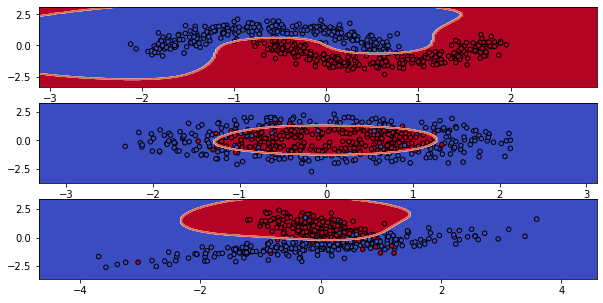

In [40]:
fig,axes = plt.subplots(3,1,figsize=(10,5))
for i,(X,y) in enumerate(dataset):
    X = scaler.fit_transform(X)
    svm.fit(X,y)
    X_pred = svm.predict(X)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02))
    
    Z = np.c_[xx.ravel(),yy.ravel()]
    Z_pred = svm.predict(Z).reshape(xx.shape)
    
    axes[i].pcolormesh(xx, yy, Z_pred, cmap=plt.cm.coolwarm)

    axes[i].contour(xx,yy,Z_pred,cmap=plt.cm.coolwarm)
    
    axes[i].scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolor='k')

- pcolormesh(\[X, Y,\] C, \*\*kwargs)<br>
    X,Y는 coordinate<br>
    C는 색이 칠해질 2-D array
- contour(\[X, Y,\] Z, \[levels\], \*\*kwargs) : 등고선 그리기<br>
    X,Y는 coordinate<br>
    Z는 contour가 그려질 높이 values<br>
    level은 contour의 line,region의 위치와 개수. 자연수 n을 받으면 n+1개가 그려진다, 배열을 받으면 특정 레벨에서 그려진다.